In [105]:
import pandas as pd
import numpy as np
from IPython.display import display

# Q1

## Familiarizing

### sec1

In [106]:
df = pd.read_csv("/Users/mac_ori/Desktop/DataScience/hw1/bank-full_2016.csv")


### sec2

In [251]:
print 'dimensions of df: ',(df.shape), '\n'
print 'attributes list:\n', [attr for attr in df.columns], '\n'
print("Outcome frequencies are: ")
display(df.groupby(df.outcome).size())
print("4. The first 5 rows of the table:\n");
display(df.head(5))

dimensions of df:  (45211, 17) 

attributes list:
['age', 'job', 'marital', 'education', 'default_credit', 'balance', 'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration', 'campaign', 'days_from_last_contact', 'previous_campaign_contacts', 'previous_campaign_outcome', 'outcome'] 

Outcome frequencies are: 


outcome
no     39922
yes     5289
dtype: int64

4. The first 5 rows of the table:



,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no


### sec3

In [295]:
df.dtypes

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
isContactKnown                   bool
dtype: object

## Manipulating

### sec 1

In [252]:
df['isContactKnown'] = (df['contact'] != 'unknown')


### sec 2

In [47]:
df['campaign'] = df['campaign'].astype('category')

## Distribution

### sec 1

In [48]:
df.describe()

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


### sec 2

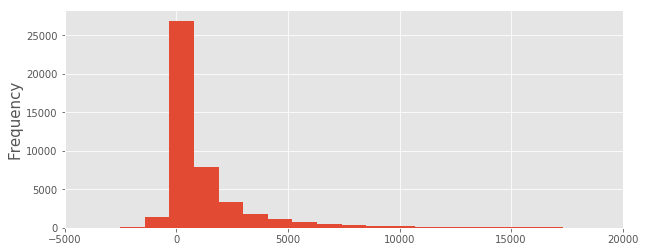

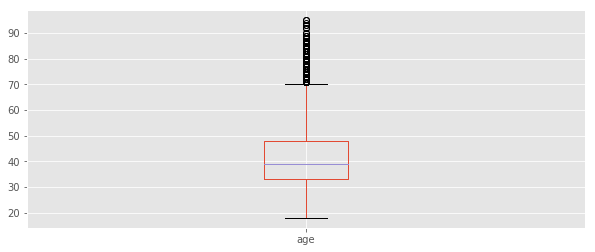

In [260]:
import matplotlib.pyplot as plt
df['balance'].plot.hist(xlim=(-5000,20000), bins=100)
plt.show()
df.boxplot('age',showfliers=False)
plt.show()

### sec 3

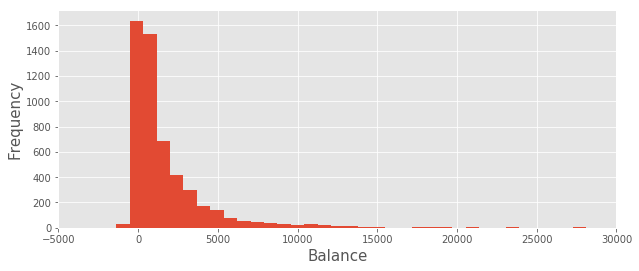

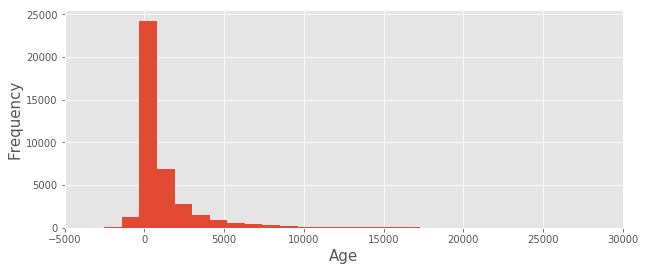

In [293]:
pos = df[(df["outcome"] == "yes")]["balance"].plot.hist(bins=100, xlim=(-5000, 30000))
pos.set_xlabel('Balance')
plt.show()

neg = df[(df["outcome"] == "no")]["balance"].plot.hist(bins=100, xlim=(-5000, 30000))
neg.set_xlabel('Age')
plt.show()

# Q2

 ## Missing values 

### sec 1

In [272]:
for col in df.columns:
    nas = df[col].isna().sum()
    if(nas > 0):
        print col, ": ", nas, " NaN values"


days_from_last_contact :  36954  NaN values


### sec 2

In [274]:
df2 = df[(df['contact'] != 'cellular') & (df['contact'] != 'telephone')]

### sec 3

In [286]:
df3 = df[df['days_from_last_contact'].isna()]
print 'Number of people with "days_from_last_contact" = NaN:', df3.shape[0]
print 'Number of people with "previous_campaign_contacts"= 0 (false):', df[df['previous_campaign_contacts'] == 0].shape[0]
print 'Therefore we can assume that "days_from_last_contact" = NaN when previous_campaign_contacts = 0'


Number of people with "days_from_last_contact" = NaN: 36954
Number of people with "previous_campaign_contacts"= 0 (false): 36954
Therefore we can assume that "days_from_last_contact" = NaN only for those with previous_campaign_contacts = 0


## Discretization

### sec1

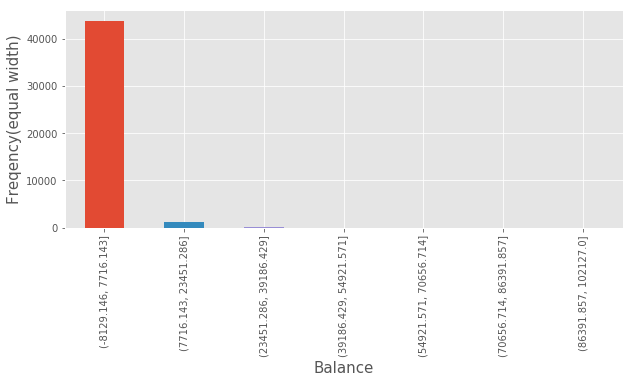

In [298]:
bal = pd.cut(df['balance'], 7).value_counts(sort=False).plot(kind='bar')
bal.set_ylabel('Freqency(equal width)')
bal.set_xlabel('Balance')
plt.show()

### sec 2 

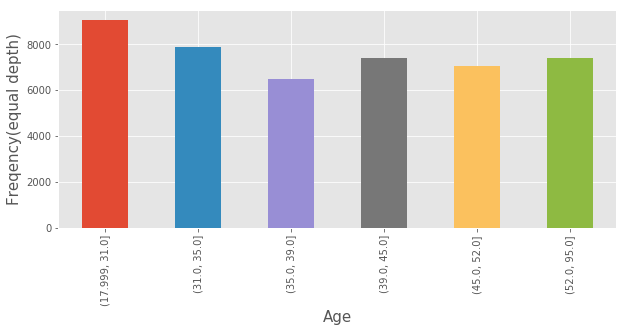

In [300]:
ag = pd.qcut(df['age'], q=6).value_counts(sort=False).plot(kind='bar')
ag.set_xlabel('Age')
ag.set_ylabel('Freqency(equal depth)')
plt.show()

# sec 3 - Todo !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Q3 

## Correlation

### sec 1

In [307]:
print 'Age - Balance correlations: '
print 'Pearson:', df['age'].corr(df['balance'], method='pearson')
print 'Spearman:', df['age'].corr(df['balance'], method='spearman')

Age - Balance correlations: 
Pearson: 0.09778273937134747
Spearman: 0.096380304771986


### sec 2

## Check why different

In [315]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr(method='pearson')
# display(df.corr(method ='pearson'))

,age,balance,day,duration,campaign,days_from_last_contact,previous_campaign_contacts
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.107863,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,-0.108122,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.090095,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.024407,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,0.050534,-0.032855
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.032855,-0.021885,1.000000


## Mutual information 

### sec 1  - Comapre!!!!!!!!!!!!!!!!!!!!!!!

In [328]:
import scipy.stats as sc_st

max1 = 0
max_col=0
for col in df.columns:
    p = df[col].value_counts()
    ent = sc_st.entropy(pk=p)
    if ent>max1:
        max1 = ent
        max_col = col
print 'col', maxcol, 'has the biggest entropy:', max



col balance has the biggest entropy: 7.789099488898226


In [343]:
from sklearn import metrics as sk_m

max_col=0
max1 = 0
for col in df.columns:
    if (col != 'outcome'):
        mu_inf = sk_m.mutual_info_score(df[col], df['outcome'])
        if mu_inf > max1:
            max1 = mu_inf
            max_col = col
print max_col, 'has the highest mutual information with outcome.\nValue:', max1


days_from_last_contact has the highest mutual information with outcome.
Value: 0.28385535548141017


# Q4 - TODO